100%|██████████| 2000/2000 [00:40<00:00, 49.45it/s]


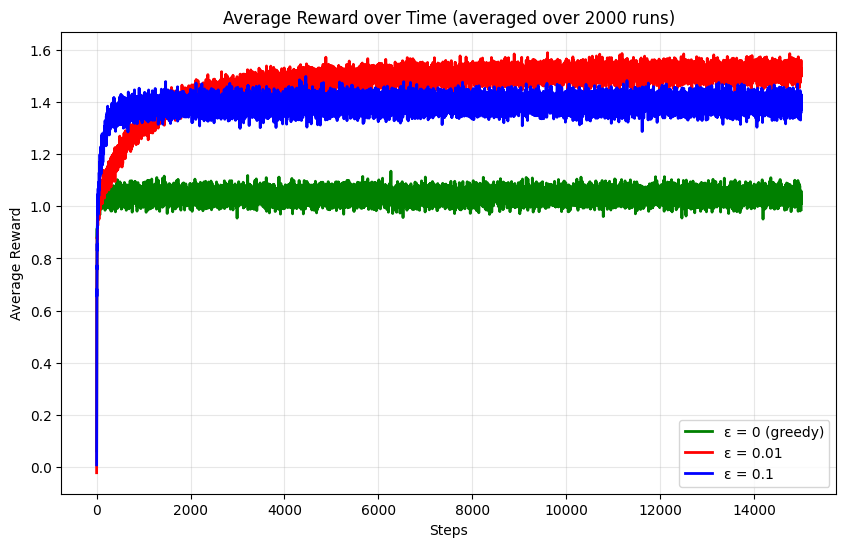

1.0402666215991452
1.5138682526208727
1.3942410738569813


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

NUM_RUNS = 2000
NUM_STEPS = 15000
K = 10

def run_simulation(epsilon):
    
    true_action_values = np.random.randn(K)
    rewards = []

    def sample_reward(index):
        return np.random.randn() + true_action_values[index]

    def choose_action(epsilon, estimated_action_values):
        if np.random.rand() < epsilon:
            return np.random.randint(K)
        else:
            return np.argmax(estimated_action_values)

    estimated_action_values = np.zeros(K)
    visit_counts = np.zeros(K)

    for i in range(NUM_STEPS):
        action = choose_action(epsilon, estimated_action_values)
        reward = sample_reward(action)
        visit_counts[action] += 1
        estimated_action_values[action] += (1 / visit_counts[action]) * (reward - estimated_action_values[action])
        rewards.append(reward)

    return rewards

def get_simulation_results(epsilon):
    all_rewards = []
    for i in tqdm(range(NUM_RUNS)):
        rewards = run_simulation(epsilon)
        all_rewards.append(rewards)
    
    all_rewards = np.array(all_rewards)
    average_reward_per_step = np.mean(all_rewards, axis=0)
    average_reward_over_last_1000 = np.mean(average_reward_per_step[-2000:])
    return average_reward_per_step, average_reward_over_last_1000

eps_0_results, eps_0_avg_over_last_2000 = get_simulation_results(0.0)
eps_0_01_results, eps_0_01_avg_over_last_2000 = get_simulation_results(0.01)
eps_0_1_results, eps_0_1_avg_over_last_2000 = get_simulation_results(0.1)

plt.figure(figsize=(10, 6))
plt.plot(range(1, NUM_STEPS + 1), eps_0_results, 'g-', linewidth=2, label='ε = 0 (greedy)')
plt.plot(range(1, NUM_STEPS + 1), eps_0_01_results, 'r-', linewidth=2, label='ε = 0.01')
plt.plot(range(1, NUM_STEPS + 1), eps_0_1_results, 'b-', linewidth=2, label='ε = 0.1')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Average Reward over Time (averaged over ' + str(NUM_RUNS) + ' runs)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(eps_0_avg_over_last_2000)
print(eps_0_01_avg_over_last_2000)
print(eps_0_1_avg_over_last_2000)


In [36]:
# .1 will be greedy an additional 9% of the time
#  but 10% of that 9% will by chance be optimal
#  so we expect .01 to be approximately 8.1% better than .1 in the limit this is in choosing the optimal action
# for the difference in average reward it is about 9% better as u can see in our test
# cause u just do .9 / .99 which is .909
print((1 - ( eps_0_1_avg_over_last_1000 / eps_0_01_avg_over_last_1000) ))

0.0790208649641656
